# Students Adaptability Level in Online Education
Effectiveness of online education


## Dataset

**Introducción**

Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of Students’ Adaptability Level Prediction in Online Education using Machine Learning Approaches


**Fuente**

the original research paper. Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches or DOI: 10.1109/ICCCNT51525.2021.9579741

https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

**Inspiration**

To get an idea about the effectiveness of online education




**Variables**

The target feature is:
Adaptivity level

The feature sets are:
Gender |
Age|
Education Level|
Institution Type|
IT Student|
Location in Town|
Load-shedding|
Financial Condition|
Internet Type|
Network Type|
Class Duration|
Self LMS|
Device|



## Imports

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
#from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

#from skopt.space import Real, Integer
#from skopt.utils import use_named_args
#from skopt import gp_minimize
#from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
#from fitter import Fitter, get_common_distributions
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##  Análisis exploratorio

1.1) Leamos los datos del archivo students_adaptability_level_online_education.csv



In [2]:
data_raw = pd.read_csv('students_adaptability_level_online_education.csv')
data_raw.shape

(1205, 14)

la exploracion descriptiva es vital en el analisis de cualquier dataset, pues permite comprender como se presenta la informacion,identificar errores y corregirlos, segmentar informacion, eliminar valores extremos, identificar las posibles hipotesis a las que el analisis de datos intentara dara respuesta.

In [3]:
data_raw.head(4)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate


identificamos las columnas y renombramos por facilidad de analisis

In [4]:
data_raw.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

Renombramos las columnas

In [5]:
data_raw.rename(columns={"Gender":"gender","Age":"age","Education Level":"education_level",
"Institution Type":"institution_type","IT Student":"IT_student","Location":"location",
"Load-shedding":"electricity_supply","Financial Condition":"financial_condition",
"Internet Type":"internet_type","Network Type":"network_type","Class Duration":"class_duration",
"Self Lms":"learning_system","Device":"device","Adaptivity Level":"adaptivity_level",
} ,inplace=True)

In [6]:
data_raw.head(4)

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate


identificamos el tipo de datos con los que se va a trabajar, comprobando que sean correctos 

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               1205 non-null   object
 1   age                  1205 non-null   object
 2   education_level      1205 non-null   object
 3   institution_type     1205 non-null   object
 4   IT_student           1205 non-null   object
 5   location             1205 non-null   object
 6   electricity_supply   1205 non-null   object
 7   financial_condition  1205 non-null   object
 8   internet_type        1205 non-null   object
 9   network_type         1205 non-null   object
 10  class_duration       1205 non-null   object
 11  learning_system      1205 non-null   object
 12  device               1205 non-null   object
 13  adaptivity_level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
data_raw.describe()

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [9]:
data_raw.shape

(1205, 14)

revisamos datos ausentes y nulos

In [10]:
data_raw.isna().sum().sort_values()

gender                 0
age                    0
education_level        0
institution_type       0
IT_student             0
location               0
electricity_supply     0
financial_condition    0
internet_type          0
network_type           0
class_duration         0
learning_system        0
device                 0
adaptivity_level       0
dtype: int64

Por lo visto no se tienen datos nulos.

# Variables cualitativas

nuestro dataset esta compuesto en su totalidad por variables cualitativas

Veamos qué procentaje de registros hay en cada una de las categorías target

In [11]:
data_raw.select_dtypes(include=['object']).describe()

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


dentro de la descripcion de los datos se identifica que el nivel de adaptabilidad que mas se repite es moderado,las variables mas frecuentes esta masculino para el genero
instituciones no gubernamentales a travez de medios moviles en nivel de escolaridad colegio y una condicion financiera media.

Text(0.5, 1.0, 'adaptivity_level')

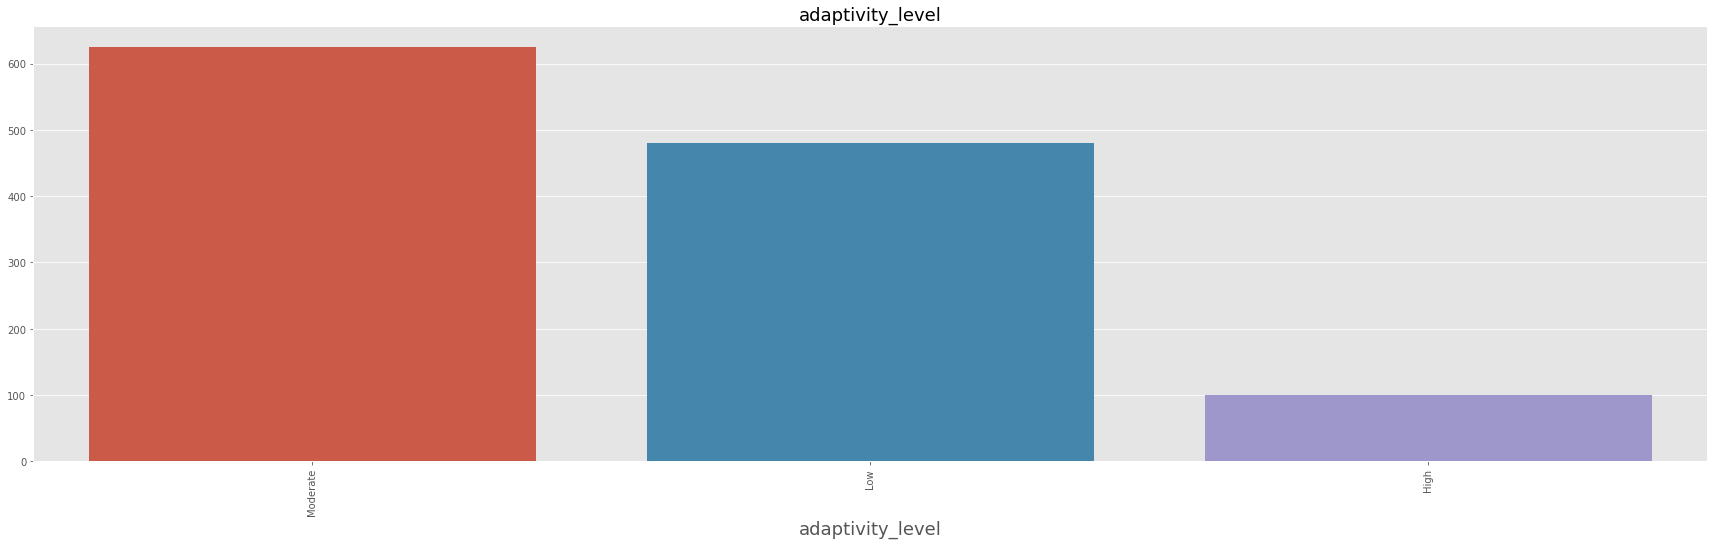

In [12]:
#Graficamente

import seaborn as sns
plt.figure(figsize=(30,8))
sns.countplot(x='adaptivity_level',data=data_raw)
plt.xticks(rotation=90)
plt.xlabel("adaptivity_level", fontsize=18)
plt.ylabel("", fontsize=18)
plt.title("adaptivity_level", fontsize=18)

#Ver outlayers - Detecting the outliers

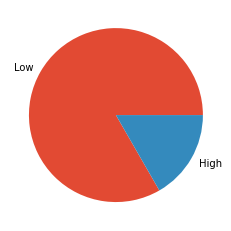

In [13]:
y=data_raw['electricity_supply'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

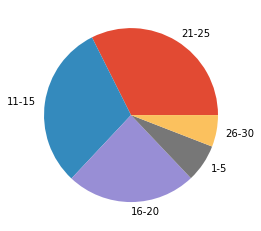

In [14]:
y=data_raw['age'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

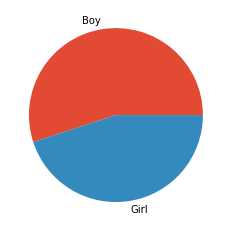

In [15]:
y=data_raw['gender'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()


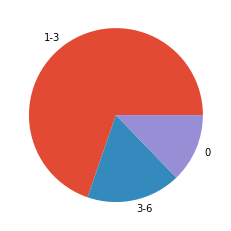

In [16]:
y=data_raw['class_duration'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()



In [17]:
#Ver porcentaje de valores atipicos
target =pd.DataFrame(data_raw['class_duration'].value_counts())
target['porcentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,class_duration,porcentaje
1-3,840,69.71
3-6,211,17.51
0,154,12.78


Procedemos con la imputación por la moda de estos valores para class_duration

In [18]:
data_raw.class_duration[data_raw.class_duration == "0"] = "1-3"


In [19]:
#Ver porcentaje de valores atipicos post imputacion
target =pd.DataFrame(data_raw['class_duration'].value_counts())
target['porcentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,class_duration,porcentaje
1-3,994,82.49
3-6,211,17.51


Hasta aqui se logra un data set limpio con 3 categorias en la variable target. Se destinará este para realizar una regresión multiclase

In [20]:
data_raw.head(15)

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


Con las variables cualitativas el balanceo juega un papel fundamental, sobretodo la variable target, si alguno de los niveles de cada variable tiene muy pocas observaciones existe una alta probabilidad de que al realizar cross validation o bootstrapping, algunas particiones dejen por fuera este nivel o no contengan ninguna observacion de estos grupos minoritarios(varianza cero), no tener presente esto genera errores en los modelos, por lo que suele ser conveniente :

si solo tiene 2 subgrupos, eliminar uno.
si la variable es multiclase eliminar el grupo minoritario 
Agrupar en un solo grupo los grupos minoritarios.

de esta manera se garantiza que en las particiones de prueba todoslos grupos esten representados.

Se genera un nuevo dataset que  serviran para realizar la mayoria de modelados. Se combina las categorias Moderado y High correspondientes a la variable adaptabilidad.

In [21]:
data_clean=data_raw.copy()

In [22]:

data_clean.adaptivity_level[data_raw.adaptivity_level=='Moderate']='High'
data_clean.groupby(['adaptivity_level']).size()

adaptivity_level
High    725
Low     480
dtype: int64

Text(0.5, 1.0, 'adaptivity_level')

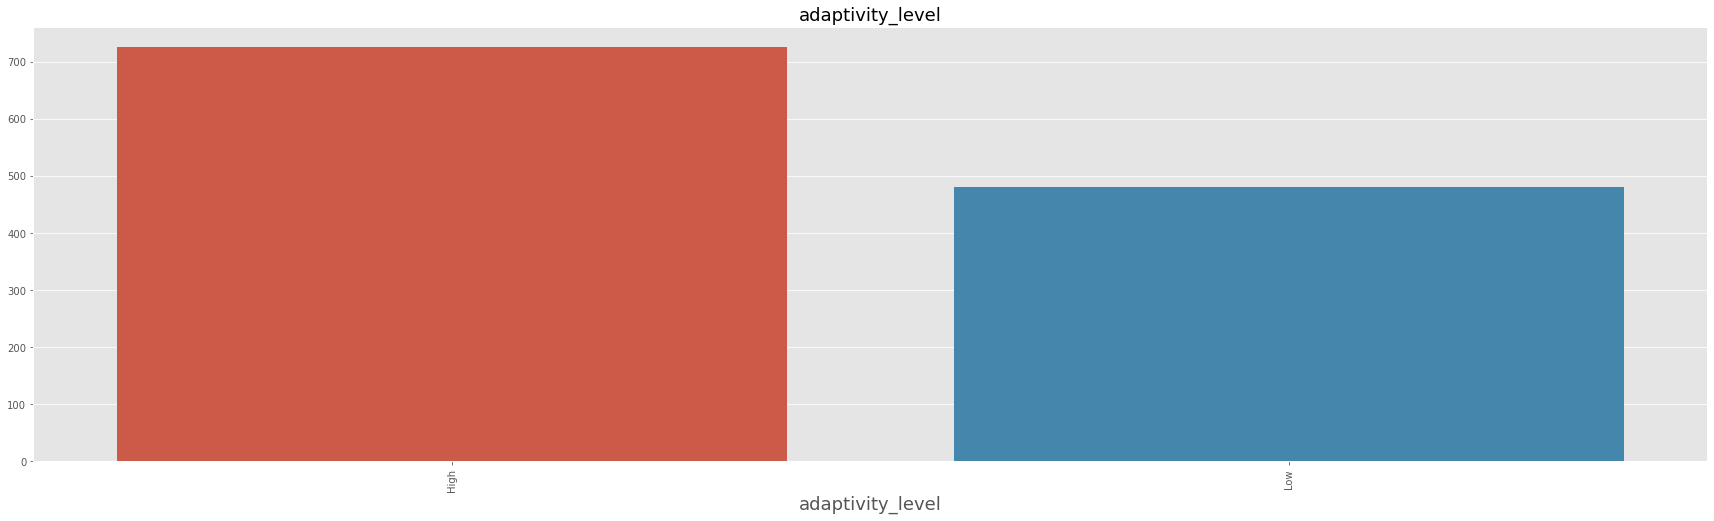

In [23]:
import seaborn as sns
plt.figure(figsize=(30,8))
sns.countplot(x='adaptivity_level',data=data_clean)
plt.xticks(rotation=90)
plt.xlabel("adaptivity_level", fontsize=18)
plt.ylabel("", fontsize=18)
plt.title("adaptivity_level", fontsize=18)

In [24]:
data_clean.head(15)

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,High
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,High
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,High
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,High
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,High
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,High


# DANIELA MARIN : 
*Visualizacion con pivot_table, crosstable y plotly 
*modelos de ensamble: bagging /boosting con tree y regresion logistic



In [25]:

#df1.head(2)
df1=data_clean


In [26]:
table3= pd.pivot_table(df1, index=['adaptivity_level'], columns=['financial_condition'],
           aggfunc={'financial_condition':len},fill_value=0)
table3

financial_condition          
financial_condition                 Mid Poor Rich
adaptivity_level                                 
High                                537  113   75
Low                                 341  129   10

In [27]:
table7 = pd.pivot_table(df1, index=['adaptivity_level'], columns=['financial_condition', 'education_level'],
           aggfunc={'financial_condition':len,'education_level':len},fill_value=0)
table7

education_level                                   \
financial_condition             Mid                      Poor          
education_level             College School University College School   
adaptivity_level                                                       
High                             96    236        205       3     66   
Low                             104    100        137      14     77   

                                                         financial_condition  \
financial_condition               Rich                                   Mid   
education_level     University College School University             College   
adaptivity_level                                                               
High                        44       0     46         29                  96   
Low                         38       2      5          3                 104   

                                                                         \
financial_condition                      Poor                      Rich   
education_level     School University College School University College   
adaptivity_level                                                          
High                   236        205       3     66         44       0   
Low                    100        137      14     77         38       2   

                                       
financial_condition                    
education_level     School University  
adaptivity_level                       
High                    46         29  
Low                      5          3

In [28]:
table7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, High to Low
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   (education_level, Mid, College)          2 non-null      int64
 1   (education_level, Mid, School)           2 non-null      int64
 2   (education_level, Mid, University)       2 non-null      int64
 3   (education_level, Poor, College)         2 non-null      int64
 4   (education_level, Poor, School)          2 non-null      int64
 5   (education_level, Poor, University)      2 non-null      int64
 6   (education_level, Rich, College)         2 non-null      int64
 7   (education_level, Rich, School)          2 non-null      int64
 8   (education_level, Rich, University)      2 non-null      int64
 9   (financial_condition, Mid, College)      2 non-null      int64
 10  (financial_condition, Mid, School)       2 non-null      int64
 11  (financial

la tabla anterior nos permite conocer en detalle como la variable target de adaptabilidad se distribuye entre las otras variables categoricas, en este caso el nivel educativo y la condicion financiera, vemos facilmente que los mas adaptados estan en el nivel educativo school de condicion financiera media.

In [29]:
df1

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,High
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,High
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,High
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,High
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,High
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,High
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               1205 non-null   object
 1   age                  1205 non-null   object
 2   education_level      1205 non-null   object
 3   institution_type     1205 non-null   object
 4   IT_student           1205 non-null   object
 5   location             1205 non-null   object
 6   electricity_supply   1205 non-null   object
 7   financial_condition  1205 non-null   object
 8   internet_type        1205 non-null   object
 9   network_type         1205 non-null   object
 10  class_duration       1205 non-null   object
 11  learning_system      1205 non-null   object
 12  device               1205 non-null   object
 13  adaptivity_level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [31]:
df1.select_dtypes(include=['object']).describe()

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,2,2,3,2
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,High
freq,663,374,530,823,901,935,1004,878,695,775,994,995,1013,725


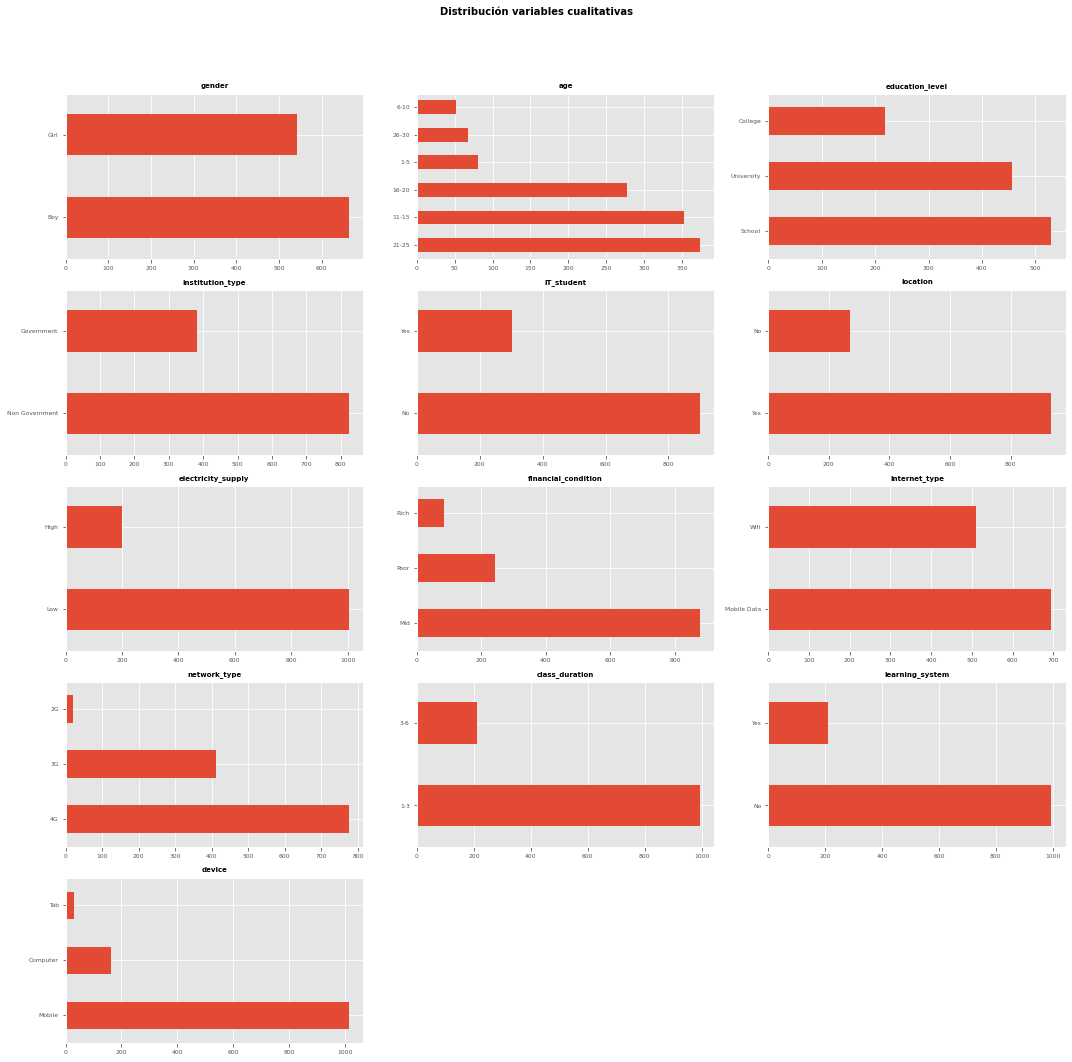

In [32]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flat
columnas_object = df1.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df1[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [13, 14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

las variables categoricas pueden presentar algunos problemas de balanceo, en algunos casos cuando uno de los grupos es muy pequeño en comparacion con otros, no se vera representado en el momento de particionar los grupos o realizar validacion cruzada o bootstrapping,por tanto no se vera representado(varianza cero), lo que puede dar lugar a errores. en estos casos conviene hacer lo que se hizo con la variable adaptabilidad, intentar sumarlo a un grupo donde este representado o eliminarla cuando sea muy pequeña en comparacion con los demas.

In [33]:
#en este caso los rangos de edad van de 1 a 30 años 
df1.age.value_counts().sort_index()

1-5       81
11-15    353
16-20    278
21-25    374
26-30     68
6-10      51
Name: age, dtype: int64

In [34]:
dic_replace = {'1-5': "0-15",
               '6-10': "0-15",
               '11-15':"0-15",
               '21-25':"21-30",
               '26-30':"21-30",}

df1['age'] = df1['age'] \
                     .map(dic_replace) \
                     .fillna(df1['age'])

In [35]:
df1.age.value_counts().sort_index()

0-15     485
16-20    278
21-30    442
Name: age, dtype: int64

In [36]:
df1.device.value_counts().sort_index()

Computer     162
Mobile      1013
Tab           30
Name: device, dtype: int64

In [37]:
dic_replace = {'Tab': "Computer"}
               
df1['device'] = df1['device'] \
                     .map(dic_replace) \
                     .fillna(df1['device'])

In [38]:
df1.device.value_counts().sort_index()

Computer     192
Mobile      1013
Name: device, dtype: int64

In [39]:
df1.network_type.value_counts().sort_index()

2G     19
3G    411
4G    775
Name: network_type, dtype: int64

In [40]:
dic_replace = {'2G': "3G"}
               
df1['network_type'] = df1['network_type'] \
                     .map(dic_replace) \
                     .fillna(df1['network_type'])

In [41]:
df1.network_type.value_counts().sort_index()

3G    430
4G    775
Name: network_type, dtype: int64

# PREPROCESAMIENTO

In [42]:
#toda la data en dummies
dfdu=pd.get_dummies(df1,drop_first=True)
dfdu

,gender_Girl,age_16-20,age_21-30,education_level_School,education_level_University,institution_type_Non Government,IT_student_Yes,location_Yes,electricity_supply_Low,financial_condition_Poor,financial_condition_Rich,internet_type_Wifi,network_type_4G,class_duration_3-6,learning_system_Yes,device_Mobile,adaptivity_level_Low
0,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0
1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0
2,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0
3,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0
4,1,1,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,1
1201,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0
1202,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0
1203,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1


In [43]:
dfdu1=pd.get_dummies(df1,drop_first=False)
dfdu1

,gender_Boy,gender_Girl,age_0-15,age_16-20,age_21-30,education_level_College,education_level_School,education_level_University,institution_type_Government,institution_type_Non Government,...,network_type_3G,network_type_4G,class_duration_1-3,class_duration_3-6,learning_system_No,learning_system_Yes,device_Computer,device_Mobile,adaptivity_level_High,adaptivity_level_Low
0,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
1,0,1,0,0,1,0,0,1,0,1,...,0,1,1,0,0,1,0,1,1,0
2,0,1,0,1,0,1,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
3,0,1,1,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,1,1,0
4,0,1,0,1,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,1,0,1,0,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
1201,0,1,0,1,0,1,0,0,0,1,...,0,1,0,1,1,0,0,1,1,0
1202,1,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,1,0
1203,0,1,0,1,0,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1


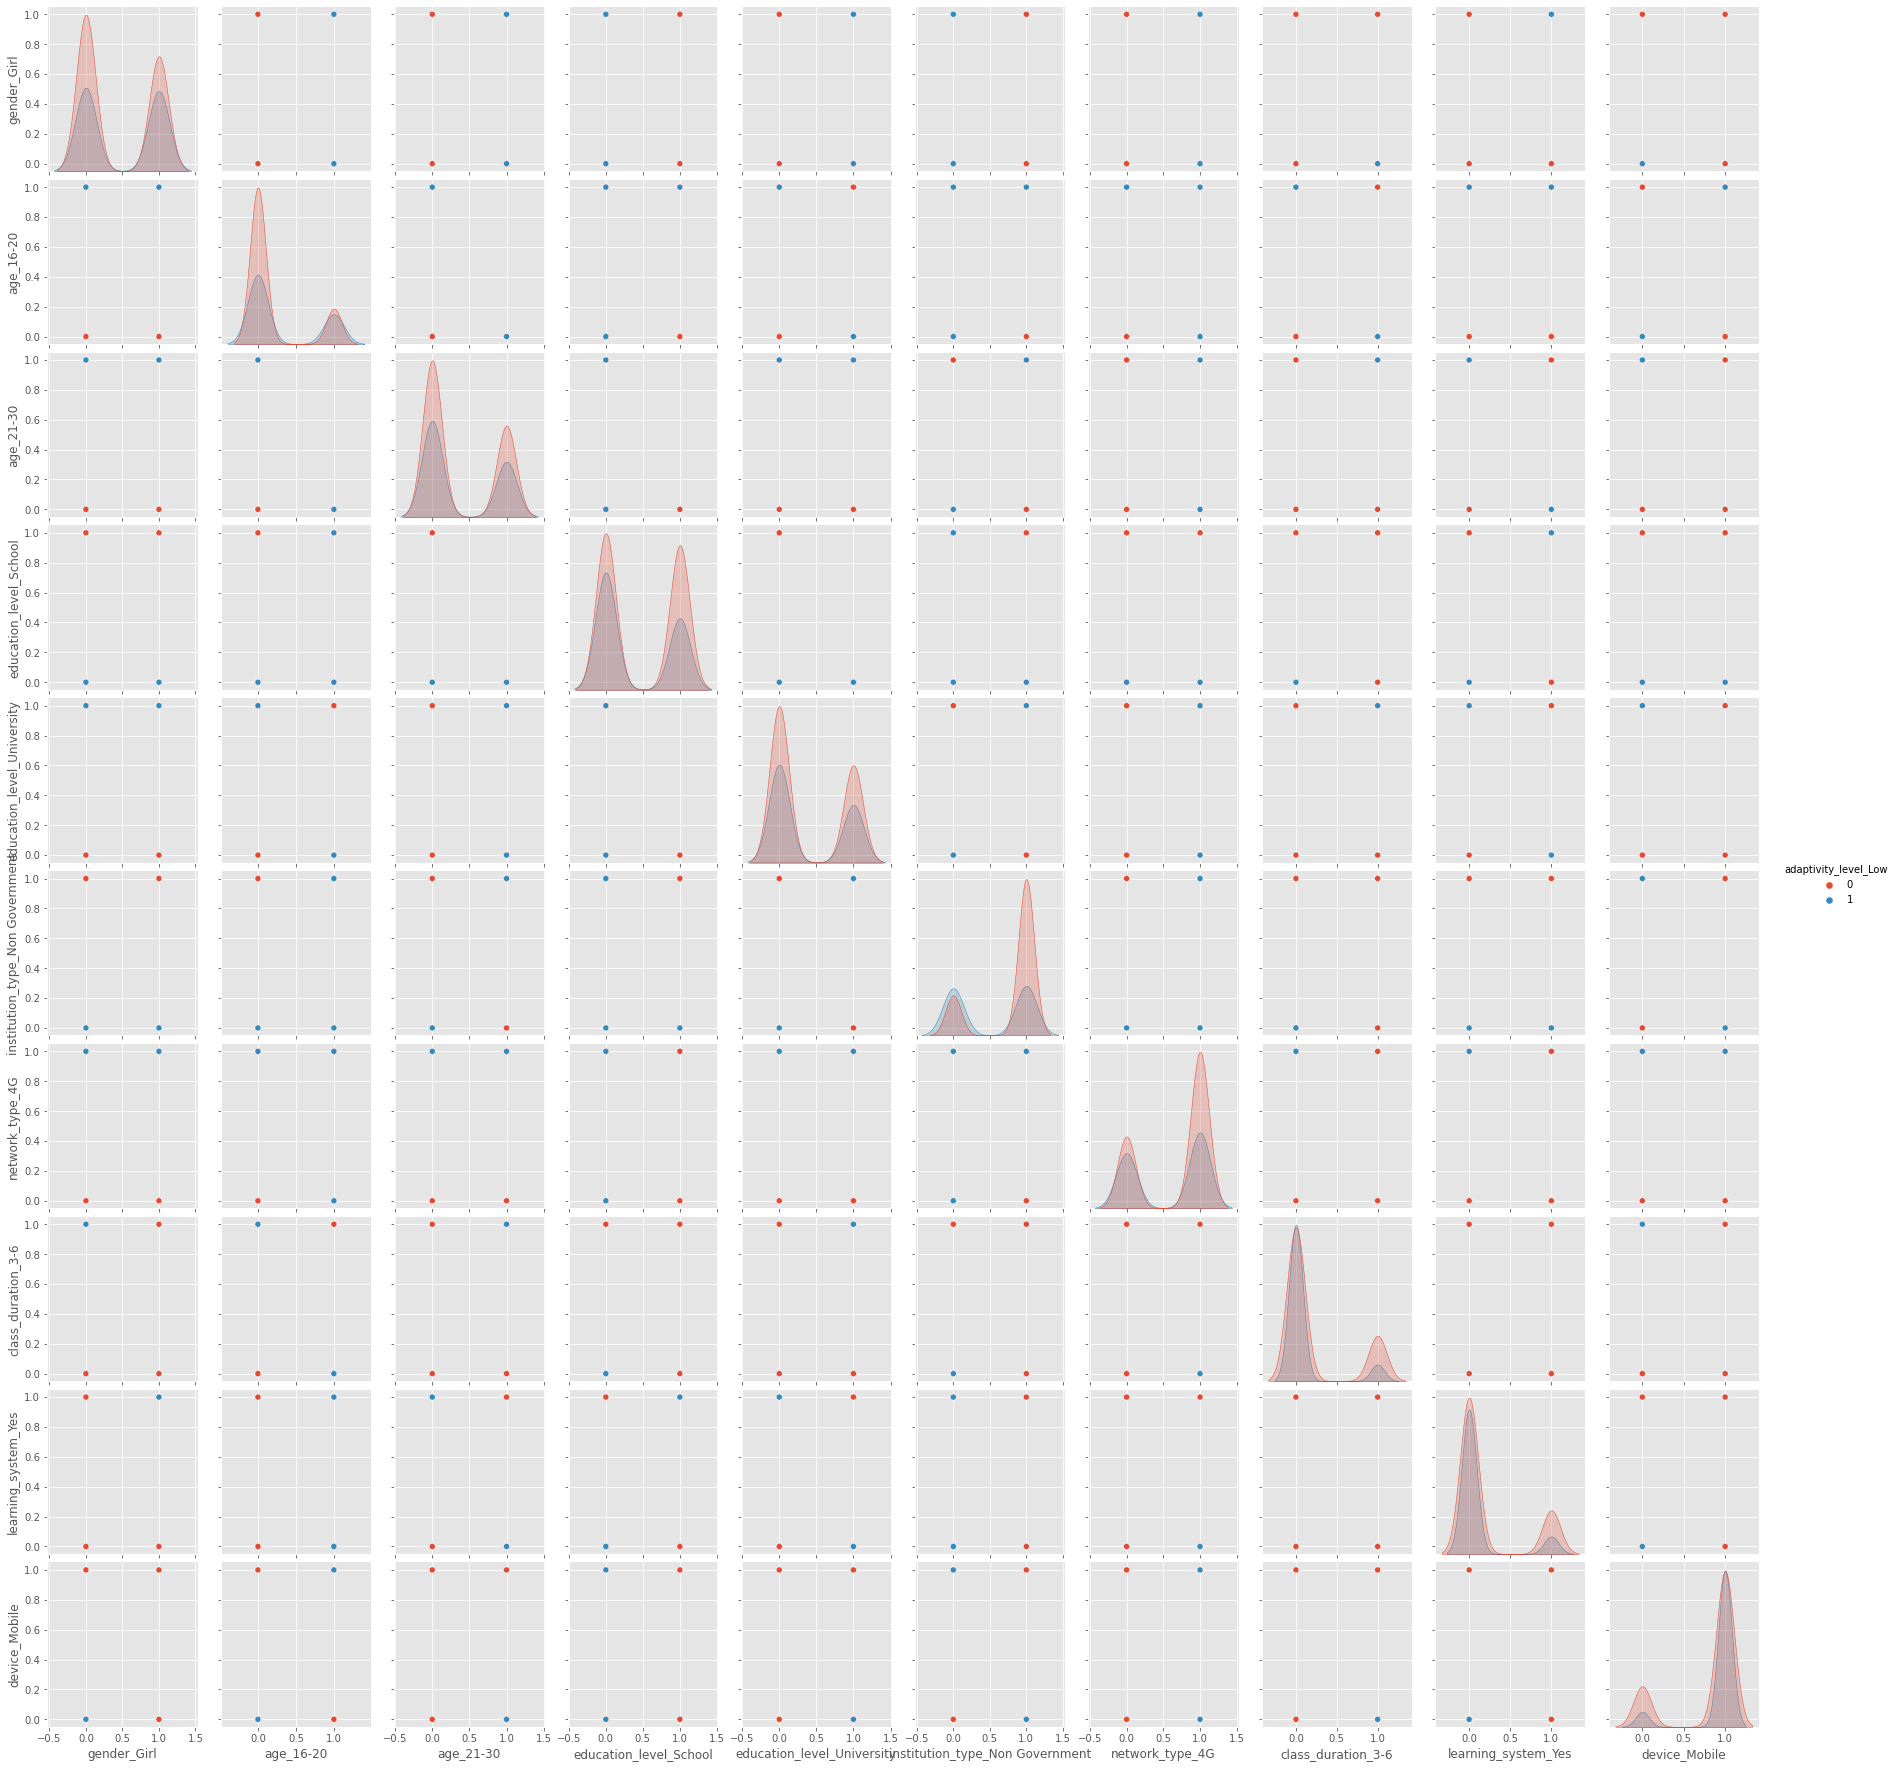

In [44]:
dfdu1=pd.get_dummies(df1,drop_first=False)
#in_var=dfdu1[["gender_Boy","gender_Girl","age_0-15","age_16-20","age_21-30","education_level_College","education_level_School","education_level_University","institution_type_Government","institution_type_Non Government","network_type_3G","network_type_4G","class_duration_1-3","class_duration_3-6","learning_system_No","learning_system_Yes","device_Computer","device_Mobile","adaptivity_level_High","adaptivity_level_Low"]]
#int_df= df1[["gender","age","education_level","institution_type","IT_student","location","electricity_supply","financial_condition","internet_type","network_type","class_duration","learning_system","device","adaptivity_level"]]
in_var=dfdu[["gender_Girl","age_16-20","age_21-30","education_level_School","education_level_University","institution_type_Non Government","network_type_4G","class_duration_3-6","learning_system_Yes","device_Mobile","adaptivity_level_Low"]]
sns.pairplot(in_var,hue="adaptivity_level_Low")
plt.show()

In [45]:
a=dfdu.corr()

<AxesSubplot:>

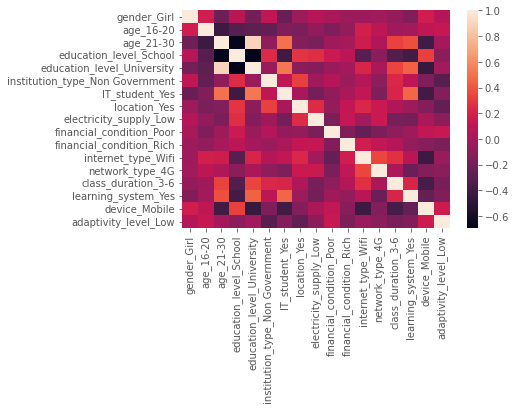

In [46]:
sns.heatmap(a)

el heatmap anterior muestra cuan correlacionadas estan las variables, la condicion financiera tiene mucho que ver con 
con la adaptabilidad

# Hipotesis del modelo 

In [47]:
dfdu['adaptivity_level_Low'].value_counts()

0    725
1    480
Name: adaptivity_level_Low, dtype: int64

buscamos comprender la adaptabilidad de los estudiantes a la educacion virtual, en este caso el planteamento de nuestra hipotesis nula
partira desde la proporcionalidad de los datos, entendiendo que de un total de 1205 observaciones 725 se han adaptado, un total de 
60.17%, entonces diremos:
   

 Ho: los estudiantes se adaptan si capacidad predictiva del modelo>60.17%


 H1: los estudiantes no se adaptan si la capacidad predictiva del modelo < 60.17%

In [48]:
# ESTABLECEMOS LA VARIABLE DEPENDIENTE E INDEPENDIENTE 
X=dfdu.drop("adaptivity_level_Low", axis = 1)
y=dfdu["adaptivity_level_Low"]

# División train y test

In [49]:
# Reparto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size   = 0.3, random_state =43, shuffle = True)
                                    

In [50]:
#iniciamos el scaler 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [51]:
#inicializamos un modelo basico 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline

arbol=DecisionTreeClassifier()

In [52]:
#ordenamos operaciones como una lista 
opera=[('scaler',scaler),('arbol',arbol)]

# Pipeline 

In [53]:
pipe=Pipeline(opera)

inicializamos las operaciones y las colocamos en un pipeline , esto coloca especificamente las operaciones que se ejecutaran dentro de pipeline 
en un orden especifico,el primer paso colocamos los datos escalados en una tuberia que pasaran al modelo ajustado 

# Hiperparametros 

 antes de tunnear los hiperparametros del modelo para saber cuales son los mejores debemos conocerlos 

In [54]:
arbol.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [55]:
# modificamos lso siguientes parametros 
depth=np.logspace(-5, 3, 10)

para buscar los mejores hiperparametros bajo estas condiciones, utilizamos un gridsearch

In [56]:
#establecemos los parametros del grid 
param_grid= {'max_depth':depth}

In [57]:
param_grid={'arbol__max_depth':depth}

In [58]:
# unimos todo 
grid=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

#entrenamos un nuevo pipeline 
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('arbol', DecisionTreeClassifier())]),
             param_grid={'arbol__max_depth': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])},
             scoring='accuracy')

In [59]:
# los mejores parametros del modelo 
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('arbol', DecisionTreeClassifier(max_depth=129.15496650148827))],
 'verbose': False,
 'scaler': StandardScaler(),
 'arbol': DecisionTreeClassifier(max_depth=129.15496650148827),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'arbol__ccp_alpha': 0.0,
 'arbol__class_weight': None,
 'arbol__criterion': 'gini',
 'arbol__max_depth': 129.15496650148827,
 'arbol__max_features': None,
 'arbol__max_leaf_nodes': None,
 'arbol__min_impurity_decrease': 0.0,
 'arbol__min_samples_leaf': 1,
 'arbol__min_samples_split': 2,
 'arbol__min_weight_fraction_leaf': 0.0,
 'arbol__random_state': None,
 'arbol__splitter': 'best'}

In [60]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('arbol',
                 DecisionTreeClassifier(max_depth=129.15496650148827))])

vemos que el mejor estimador sera un arbol con 16.68 de profundidad 

In [61]:
#para verificarlo miramos el accuracy asociado a la profundidad 

acc=grid.cv_results_['mean_test_score']
arbol_acc= pd.DataFrame({'depth':depth,'Accuracy':acc})
arbol_acc=arbol_acc.set_index('depth').transpose()
round(arbol_acc,2)

depth,0.000010,0.000077,0.000599,0.004642,0.035938,0.278256,2.154435,16.681005,129.154967,1000.000000
Accuracy,0.58,0.58,0.58,0.58,0.58,0.58,0.67,0.86,0.86,0.86


como vemos  el mejor estimador asociado cumple con una profundidad de 16.681005 y un accuracy de 0,86

ya tenemos el mejor hiperparametro buscamos el mejor modelo.

# Modelo modificado 

lo que haremos sera tomar el mejor resultado de Gridsearch 16.681005, usaremos pipelines y evaluaremos en nuestro conjunto de datos de test 

In [62]:
# configuramos las operaciones 
scaler= StandardScaler()
arbol_1=DecisionTreeClassifier(max_depth=16.681005372000556)
opera1=[('scaler',scaler),('arbol_1',arbol_1)]

In [63]:
#configuro el pipeline 
pipe =Pipeline(opera1)

In [64]:
# entreno el pipeline 
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('arbol_1',
                 DecisionTreeClassifier(max_depth=16.681005372000556))])

In [65]:
pipe_pred= pipe.predict(X_test)

In [66]:
#reporte
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       237
           1       0.89      0.93      0.91       125

    accuracy                           0.93       362
   macro avg       0.92      0.93      0.93       362
weighted avg       0.93      0.93      0.93       362



mejoramos la presicion del modelo, paso de 0.86 a 0.93

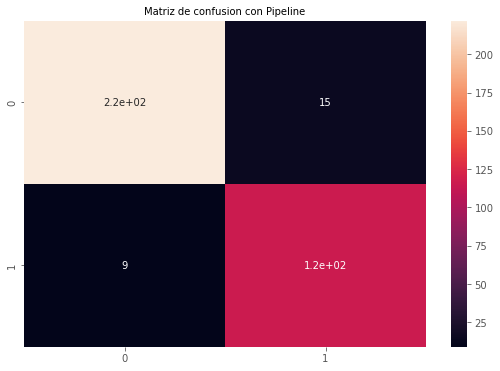

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(9,6))
plt.title('Matriz de confusion con Pipeline', fontsize=10)
sns.heatmap(confusion_matrix(y_test,pipe_pred), annot=True, cmap='rocket')
plt.show()

como vemos el primer modelo de arbol tiene un alto accuracy, logra predecir en un 94% de los casos, debemos tener cuidado de no 
presentar sobreajuste (overfiting)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression


In [69]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                      ('pca1',PCA(n_components=2)),
                      ('lr_classifier',LogisticRegression(random_state=0))])

In [70]:
pipeline_tree=Pipeline([('scaler2',StandardScaler()),
                      ('pca2',PCA(n_components=2)),
                      ('tree_classifier',DecisionTreeClassifier())])

In [71]:
pipeline_randomforest= Pipeline([('scaler3',StandardScaler()),
                                 ('pca3',PCA(n_components=2),
                                 ('rd_classifier',RandomForestClassifier()))])

In [72]:
#hacemos lista pipelines 
pipelines= [pipeline_lr, pipeline_tree, pipeline_randomforest]

In [73]:
best_accuracy=0
best_classifier=0
best_pipeline=''

In [74]:
pipe_dict= {0:'Logistic Regression', 1:'Decision Tree', 2: 'RandomForest'}

In [75]:
#entrenamiento
for pipe in pipelines:
    pipe.fit(X_train, y_train)

ValueError: too many values to unpack (expected 2)

In [ ]:
for i,model in enumerate(pipelines):
    print("{}Accuracy para el conjunto de prueba: {}".format(pipe_dict[1], model.score(X_test, y_test)))

In [ ]:
for i, model in enumerate(pipelines):
    if model.score(X_test, y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=1
print('clasificador con mejor accuracy:()'.format(pipe_dict[best_classifier]))

# MODELOS DE ENSAMBLE

In [ ]:
# Reparto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size   = 0.2, random_state =60, shuffle = True)

In [ ]:
#Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier())
#
# Instantiate the bagging classifier
#
bgclassifier1= BaggingClassifier(base_estimator=pipeline, n_estimators=4,
                                 max_features=5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier1.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

In [ ]:
bgclassifier1.get_params().keys()

In [ ]:
# modificamos el estimador
n_estimators=[40,43,56]

buscamos los mejores hiperparametros para el modelo 

In [ ]:
param_grid2= {'n_estimators':n_estimators}

In [ ]:
grid2=GridSearchCV(bgclassifier1,param_grid2,cv=5,scoring='accuracy')

In [ ]:
#entrenamos un nuevo pipeline 
grid2.fit(X_train,y_train)

In [ ]:
# los mejores parametros del modelo 
grid2.best_estimator_.get_params()

In [ ]:
grid2.best_estimator_

vemos que el mejor estimador sera un Bagging de ensamble sera n_estimators = 43

In [ ]:
#para verificarlo miramos el accuracy asociado a la profundidad 

acc2=grid2.cv_results_['mean_test_score']
bg_acc= pd.DataFrame({'n_estimators':n_estimators,'Accuracy':acc2})
bg_acc=bg_acc.set_index('n_estimators').transpose()
round(bg_acc,2)

modificamos el modelo de ensamble con n_estimators=43

In [ ]:
#Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier())
#
# Instantiate the bagging classifier
#
bgclassifier2 = BaggingClassifier(base_estimator=pipeline, n_estimators=43,
                                 max_features=5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier2.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))